In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
n = 10
trial = 1000
q_star = np.random.normal(4, 1, n)

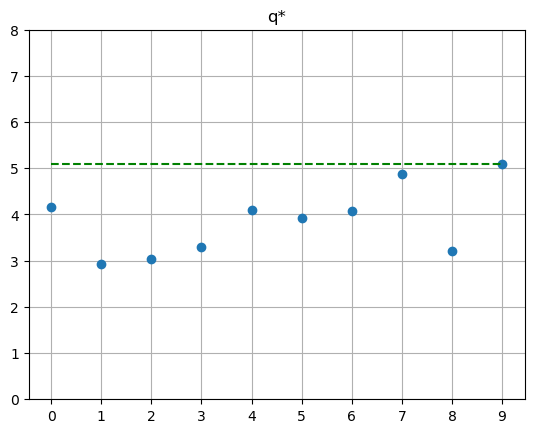

In [75]:
plt.plot(q_star, 'o')
plt.plot(range(0, n), max(q_star) * np.ones(n), 'g--')

plt.title('q*')
plt.ylim(0, 8)
plt.xticks(range(0, n))
plt.grid()
plt.show()

In [76]:
def bandit_v4(q_star, alpha, trial, comp=True):
    n = len(q_star)
    H = np.zeros(n)

    action_log = []
    reward_log = []

    average_reward = 0

    for step in range(trial):
        a_table = np.exp(H) / np.sum(np.exp(H))
        a = np.random.choice(n, p=a_table)
        action_log.append(a)
        r = np.random.normal(q_star[a], 1)
        reward_log.append(r)

        average_reward += (r - average_reward) / (step+1)

        H -= alpha * (r - comp * average_reward) * a_table
        H[a] += alpha * (r - comp * average_reward) * (1 - a_table[a])

    return action_log, reward_log

In [77]:
a1, r1 = bandit_v4(q_star, 0.1, trial, True)
a2, r2 = bandit_v4(q_star, 0.1, trial, False)
a3, r3 = bandit_v4(q_star, 0.4, trial, True)
a4, r4 = bandit_v4(q_star, 0.4, trial, False)

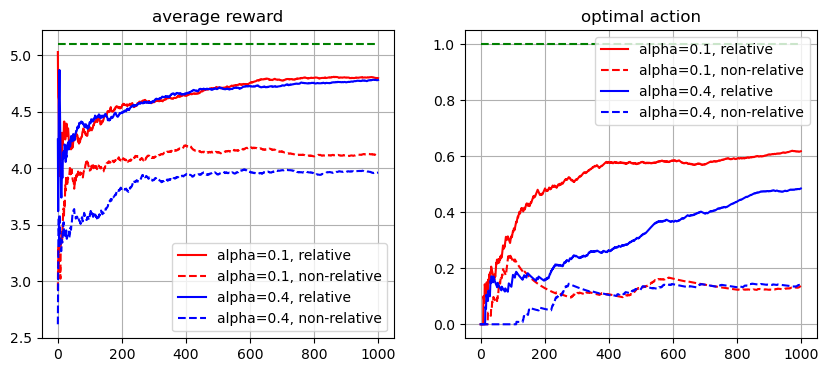

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(np.cumsum(r1) / np.arange(1, trial+1), 'r')
ax[0].plot(np.cumsum(r2) / np.arange(1, trial+1), 'r--')
ax[0].plot(np.cumsum(r3) / np.arange(1, trial+1), 'b')
ax[0].plot(np.cumsum(r4) / np.arange(1, trial+1), 'b--')
ax[0].plot(np.ones(trial) * max(q_star), 'g--')

ax[0].set_title('average reward')
ax[0].legend(['alpha=0.1, relative', 'alpha=0.1, non-relative', 'alpha=0.4, relative', 'alpha=0.4, non-relative'])
ax[0].grid()

ax[1].plot(np.cumsum(np.array(a1) == np.argmax(q_star)) / np.arange(1, trial+1), 'r')
ax[1].plot(np.cumsum(np.array(a2) == np.argmax(q_star)) / np.arange(1, trial+1), 'r--')
ax[1].plot(np.cumsum(np.array(a3) == np.argmax(q_star)) / np.arange(1, trial+1), 'b')
ax[1].plot(np.cumsum(np.array(a4) == np.argmax(q_star)) / np.arange(1, trial+1), 'b--')
ax[1].plot(np.ones(trial), 'g--')

ax[1].set_title('optimal action')
ax[1].legend(['alpha=0.1, relative', 'alpha=0.1, non-relative', 'alpha=0.4, relative', 'alpha=0.4, non-relative'])
ax[1].grid()
plt.show()